In [3]:
! pip install -q kaggle

In [4]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets download -d mlanangafkaar/datasets-lemlitbang-sibi-alphabets

100% 1.75G/1.75G [00:56<00:00, 31.4MB/s]
100% 1.75G/1.75G [00:56<00:00, 33.5MB/s]


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import warnings
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Dropout, Flatten, Dense


In [8]:
!unzip datasets-lemlitbang-sibi-alphabets.zip

Archive:  datasets-lemlitbang-sibi-alphabets.zip
  inflating: SIBI_datasets_LEMLITBANG_SIBI_R_90.10_RAW/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_RAW/desktop.ini  
  inflating: SIBI_datasets_LEMLITBANG_SIBI_R_90.10_RAW/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_RAW/test/A (4).jpg  
  inflating: SIBI_datasets_LEMLITBANG_SIBI_R_90.10_RAW/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_RAW/test/B (4).jpg  
  inflating: SIBI_datasets_LEMLITBANG_SIBI_R_90.10_RAW/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_RAW/test/C (2).jpg  
  inflating: SIBI_datasets_LEMLITBANG_SIBI_R_90.10_RAW/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_RAW/test/D (3).jpg  
  inflating: SIBI_datasets_LEMLITBANG_SIBI_R_90.10_RAW/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_RAW/test/E (2).jpg  
  inflating: SIBI_datasets_LEMLITBANG_SIBI_R_90.10_RAW/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_RAW/test/F (3).jpg  
  inflating: SIBI_datasets_LEMLITBANG_SIBI_R_90.10_RAW/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_RAW/test/G (3).jpg  
  inflating: SIBI_datasets_LEMLITBANG_SIBI

In [9]:
input_folder = "./SIBI_datasets_LEMLITBANG_SIBI_R_90.10_RAW"
output_folder = "/content/dataset"

In [10]:
# import os
# import shutil
# from sklearn.model_selection import train_test_split

# def split_data(input_folder, output_folder, split_ratio=(0.8, 0.1, 0.1), random_seed=42):
#     # Membuat folder output jika belum ada
#     if not os.path.exists(output_folder):
#         os.makedirs(output_folder)

#     # Menyusun daftar semua kategori di dalam folder input
#     categories = os.listdir(input_folder)

#     for category in categories:
#         category_path = os.path.join(input_folder, category)

#         # Mengambil daftar semua file gambar di dalam setiap kategori
#         files = [f for f in os.listdir(category_path) if f.endswith('.jpg') or f.endswith('.png')]  # Sesuaikan dengan ekstensi gambar yang digunakan

#         # Membagi data menjadi train, test, dan validation
#         train_files, test_val_files = train_test_split(files, test_size=1 - split_ratio[0], random_state=random_seed)
#         test_files, val_files = train_test_split(test_val_files, test_size=split_ratio[2]/(split_ratio[1] + split_ratio[2]), random_state=random_seed)

#         # Membuat folder untuk setiap jenis data (train, test, validation)
#         for data_type, data_files in zip(['train', 'test', 'validation'], [train_files, test_files, val_files]):
#             data_type_folder = os.path.join(output_folder, data_type, category)
#             if not os.path.exists(data_type_folder):
#                 os.makedirs(data_type_folder)

#             # Menyalin file ke folder yang sesuai
#             for file in data_files:
#                 source_path = os.path.join(category_path, file)
#                 dest_path = os.path.join(data_type_folder, file)
#                 shutil.copy(source_path, dest_path)

# split_data(input_folder, output_folder)

In [11]:
train_dir = '/content/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_RAW/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_RAW/training/'
test_dir = '/content/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_RAW/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_RAW/test'
val_dir = '/content/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_RAW/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_RAW/validation'

In [12]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [13]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=40,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    shear_range=0.2,
                    zoom_range=0.2,
                    horizontal_flip=True,
                    fill_mode='nearest'
                    )

In [51]:
val_datagen = ImageDataGenerator(
                    rescale=1./255,
                    zoom_range=0.1,
                    rotation_range=10,
                    shear_range=0.,
                    width_shift_range=0.1,
                    height_shift_range=0.1
                    )


In [52]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(64, 64),
        batch_size=2,
        class_mode='categorical',
        color_mode='grayscale'
        )

Found 468 images belonging to 26 classes.


In [53]:
validation_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(64, 64),
        batch_size=2,
        class_mode='categorical',
        color_mode='grayscale')

Found 52 images belonging to 26 classes.


In [54]:
model = Sequential([
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), strides=1, padding='same', activation='relu', input_shape=(64, 64, 1)),

    tf.keras.layers.MaxPooling2D((2, 2), strides=2, padding='same'),
    tf.keras.layers.BatchNormalization(),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), strides=1, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2, padding='same'),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), strides=1, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2, padding='same'),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), strides=1, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2, padding='same'),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), strides=1, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2, padding='same'),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    Dense(26, activation='softmax')
])

In [55]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 64, 64, 16)        160       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 32, 32, 16)        0         
 g2D)                                                            
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 16)        64        
 chNormalization)                                                
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                      

In [56]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [58]:
history = model.fit(
      train_generator,
      steps_per_epoch=len(train_generator),
      epochs=25,
      validation_data=validation_generator,
      validation_steps=len(validation_generator),
      verbose=1,
      batch_size=128)

Epoch 1/25
234/234 [==============================] - 15s 65ms/step - loss: 1.6611 - accuracy: 0.4423 - val_loss: 1.1259 - val_accuracy: 0.6538
Epoch 2/25
234/234 [==============================] - 15s 64ms/step - loss: 1.6706 - accuracy: 0.4380 - val_loss: 1.3671 - val_accuracy: 0.4808
Epoch 3/25
234/234 [==============================] - 15s 66ms/step - loss: 1.5700 - accuracy: 0.4295 - val_loss: 1.1921 - val_accuracy: 0.6154
Epoch 4/25
234/234 [==============================] - 16s 67ms/step - loss: 1.5188 - accuracy: 0.4444 - val_loss: 1.2312 - val_accuracy: 0.5577
Epoch 5/25
234/234 [==============================] - 16s 66ms/step - loss: 1.5262 - accuracy: 0.4573 - val_loss: 1.1888 - val_accuracy: 0.6923
Epoch 6/25
234/234 [==============================] - 15s 65ms/step - loss: 1.5906 - accuracy: 0.4679 - val_loss: 1.0192 - val_accuracy: 0.6731
Epoch 7/25
234/234 [==============================] - 15s 65ms/step - loss: 1.4249 - accuracy: 0.4701 - val_loss: 1.1098 - val_accuracy:

In [59]:
model.evaluate(validation_generator)

26/26 [==============================] - 1s 51ms/step - loss: 1.1349 - accuracy: 0.6154


[1.134917974472046, 0.6153846383094788]

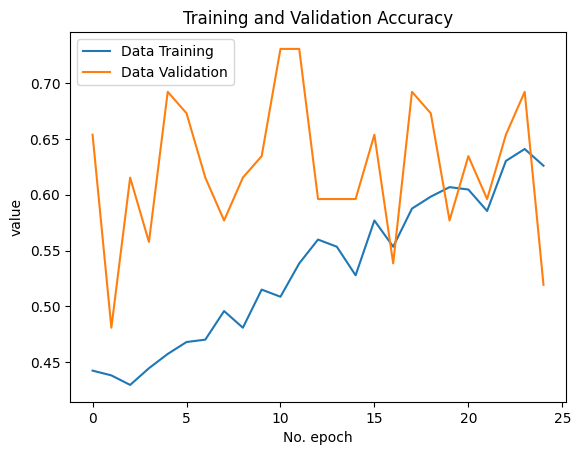

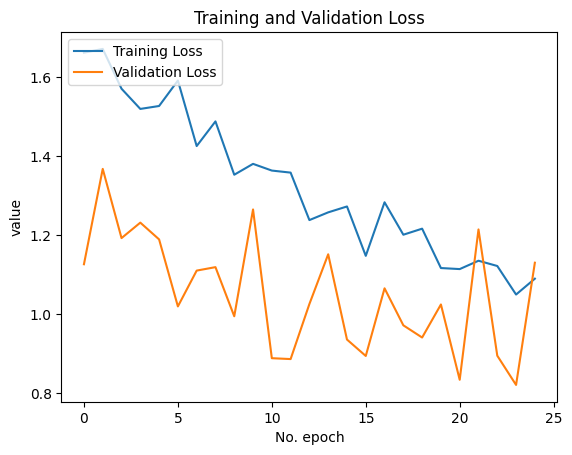

In [60]:
from matplotlib import pyplot as plt


plt.plot(history.history['accuracy'], label='Data Training')
plt.plot(history.history['val_accuracy'], label='Data Validation')
plt.title('Training and Validation Accuracy')
plt.ylabel('value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

# Plot history: MAE
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.ylabel('value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [61]:

from PIL import Image
import numpy as np
input_size = (64,64)

labels = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N',
          'O','P','Q','R','S','T','U','V','W','X','Y','Z']

In [62]:
def preprocess(img, input_size):
    nimg = img.convert('L').resize(input_size, resample=Image.BICUBIC)
    img_arr = np.array(nimg) / 255.0
    return img_arr

def reshape(imgs_arr):
    return np.stack(imgs_arr, axis=0)

In [37]:
import os
from google.colab import files

SAVE_MODEL_NAME = "slang_app.h5"
save_model_path = os.path.join( SAVE_MODEL_NAME)

print('Saving Model At {}...'.format(save_model_path))
model.save(save_model_path,include_optimizer=False)


Saving Model At slang_app.h5...


In [63]:
from tensorflow.keras.models import load_model
MODEL_PATH = '/content/slang_app (1).h5'
model = load_model(MODEL_PATH,compile=False)

In [64]:
categories = os.listdir(test_dir)

files = os.listdir(test_dir)


for data in files:
  print("______________________________")
  if data.endswith('.jpg') or data.endswith('.png'):
    print(data)
    imgg = Image.open(os.path.join(test_dir, data))
    X = preprocess(imgg,input_size)
    X = reshape([X])
    y = model.predict(X)
    print( labels[np.argmax(y)], np.max(y) )
    print("______________________________")



______________________________
H (4).jpg
1/1 [==============================] - 0s 93ms/step
H 0.9805203
______________________________
______________________________
P (4).jpg
1/1 [==============================] - 0s 17ms/step
P 0.9996464
______________________________
______________________________
W (3).jpg
1/1 [==============================] - 0s 17ms/step
W 0.9637874
______________________________
______________________________
V (3).jpg
1/1 [==============================] - 0s 19ms/step
V 0.8410022
______________________________
______________________________
B (4).jpg
1/1 [==============================] - 0s 20ms/step
B 0.9858666
______________________________
______________________________
G (3).jpg
1/1 [==============================] - 0s 20ms/step
G 0.68153864
______________________________
______________________________
N (4).jpg
1/1 [==============================] - 0s 20ms/step
M 0.6070961
______________________________
______________________________
Q (4).jpg
1/1 [=

In [65]:
from google.colab import files
im = files.upload()

In [66]:
imgg = Image.open('/content/20231202_000821 (1).jpg')
X = preprocess(imgg,input_size)
X = reshape([X])

y = model.predict(X)
print(y)
print(labels[np.argmax(y)], np.max(y), np.min(y))

1/1 [==============================] - 0s 20ms/step
[[3.0508755e-08 5.6728336e-08 5.1874281e-08 7.9167694e-07 1.3533194e-08
  4.9059960e-05 5.3882359e-06 1.2828164e-03 5.0840050e-04 1.2016436e-05
  5.1573579e-06 8.2217774e-08 6.0569403e-07 1.4443319e-06 2.0579138e-04
  9.2848086e-01 5.1649678e-02 1.9952823e-07 1.3818723e-04 3.8684719e-11
  1.1859439e-09 4.3066746e-09 5.1703196e-06 9.1542909e-03 1.3355163e-04
  8.3663780e-03]]
P 0.92848086 3.868472e-11
